In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base_model = automap_base()
# reflect the tables
base_model.prepare(engine,reflect=True)

In [7]:
# View all of the classes that automap found
base_model.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
base_measurement = base_model.classes.measurement
base_station = base_model.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
last_date = session.query(base_measurement.date).order_by(base_measurement.date.desc()).first().date
last_date

'2017-08-23'

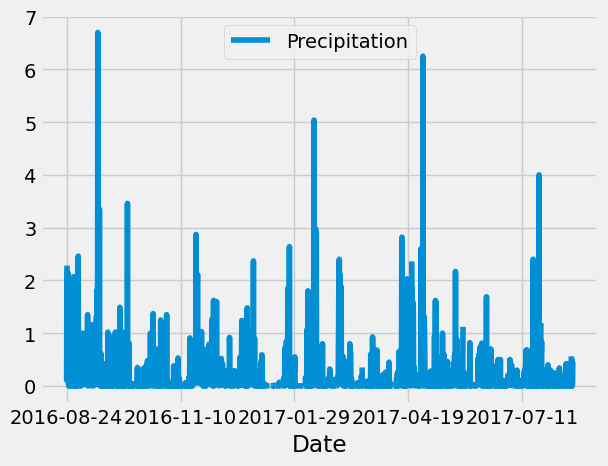

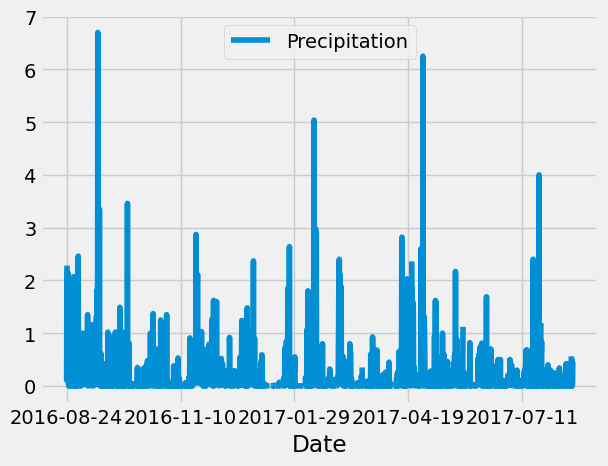

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rain_data = session.query(base_measurement.date, base_measurement.prcp).\
filter(base_measurement.date >= last_year).\
order_by(base_measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(rain_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
rain_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot().get_figure()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
session.query(base_station.station).distinct().count()
# format(stations_count.count())

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(base_measurement.station, func.count(base_measurement.station)).\
    group_by(base_measurement.station).\
    order_by(func.count(base_measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]
temp = [func.min(base_measurement.tobs),func.max(base_measurement.tobs),func.avg(base_measurement.tobs)]
session.query(*temp).all()

[(53.0, 87.0, 73.09795396419437)]

array([[<Axes: title={'center': 'tobs'}>]], dtype=object)

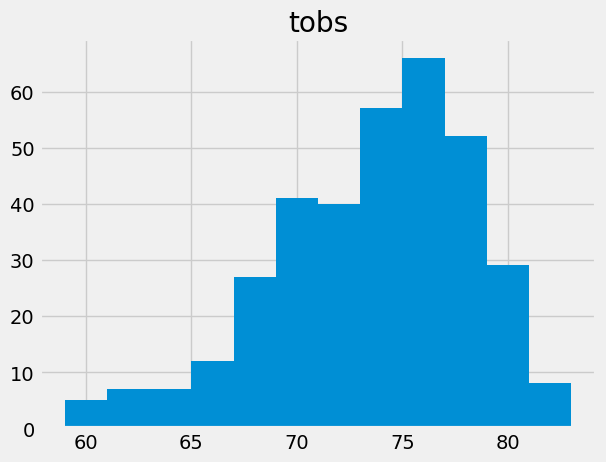

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12 = session.query(base_measurement.date, base_measurement.tobs).\
    filter(base_measurement.station == most_active).filter(base_measurement.date >= last_year).\
    group_by(base_measurement.date).all()

rain_hist = pd.DataFrame(data=last_12, columns=["date","tobs"])
rain_hist.hist(bins=12)

# Close Session

In [32]:
# Close Session
session.close()